Notebook for viewing activity summaries downloaded from Garmin Connect (https://connect.garmin.com/modern/activities, export CSV).

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os, sys
import pandas as pd

datadir = 'data'

def digital_time_to_minutes(timestr):
    to_minutes = [60,1,1/60]
    hrs,mins,secs = [conv*float(x) for x,conv in zip(timestr.split(':'), to_minutes)]
    minutes = hrs + mins + secs
    return minutes

In [50]:
[x for x in os.listdir(path=os.path.join('.',datadir)) if x[-4:]=='.csv']

['Activities_20250110.csv']

In [51]:
fname = os.path.join('.', datadir, 'Activities_20250110.csv')

In [52]:
garmin = pd.read_csv(fname)
garmin.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Steps,Total Reps,Total Sets,Decompression,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Walking,2025-01-09 09:17:47,False,McHenry County Walking,2.90,244,01:01:52,93,115,1.4,...,"6,396",--,--,No,00:18:27,3,00:51:47,01:01:52,622,979
1,Running,2025-01-07 16:47:46,False,Madison Running,2.04,188,00:19:50,161,177,3.2,...,"3,388",--,--,No,00:00:22.3,3,00:19:45,00:22:15,871,945
2,Indoor Cycling,2025-01-05 16:19:43,False,Indoor Cycling,0.00,199,00:33:16,129,165,2.2,...,--,--,--,No,00:33:16,1,00:00:00,00:33:16,--,--
3,Indoor Cycling,2024-12-31 21:57:48,False,Indoor Cycling,0.00,420,01:23:41,129,169,2.3,...,--,--,--,No,01:23:41,1,00:00:00,01:23:41,--,--
4,Walking,2024-12-31 12:28:08,False,McHenry County Walking,2.96,273,01:06:59,98,125,1.7,...,"6,370",--,--,No,00:18:48,3,00:52:49,01:06:59,867,"1,024"


## Cycling

In [120]:
sport_label = 'Cycling'
sport = garmin[garmin['Activity Type'] == sport_label]
sport.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Steps,Total Reps,Total Sets,Decompression,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
12,Cycling,2024-12-09 14:46:28,False,Madison Cycling,20.26,372,01:26:53,121,147,2.1,...,--,--,--,No,00:01:07.6,5,01:25:58,01:34:40,846,915
13,Cycling,2024-12-08 19:58:19,False,Madison Cycling,2.90,84,00:13:08,135,172,2.4,...,--,--,--,No,00:13:08,1,00:12:20,03:21:03,622,929
14,Cycling,2024-12-07 22:28:02,False,Madison Cycling,1.38,43,00:07:00.9,126,153,1.4,...,--,--,--,No,00:07:00.9,1,00:06:50,00:07:17.9,850,918
15,Cycling,2024-12-07 10:45:34,False,Madison Cycling,3.47,138,00:16:35,152,178,2.8,...,--,--,--,No,00:16:35,1,00:16:12,00:19:53,860,904
17,Cycling,2024-12-04 07:39:33,False,Madison Cycling,3.13,95,00:15:50,128,149,1.6,...,--,--,--,No,00:15:50,1,00:14:57,02:22:54,860,973


In [121]:
sport['Best Lap Time'].head()

12    00:01:07.6
13      00:13:08
14    00:07:00.9
15      00:16:35
17      00:15:50
Name: Best Lap Time, dtype: object

In [122]:
type(sport['Avg HR'])

pandas.core.series.Series

In [123]:
[digital_time_to_minutes(t) for t in np.array(sport['Best Lap Time'])][:5]

[1.1266666666666667,
 13.133333333333333,
 7.015,
 16.583333333333332,
 15.833333333333334]

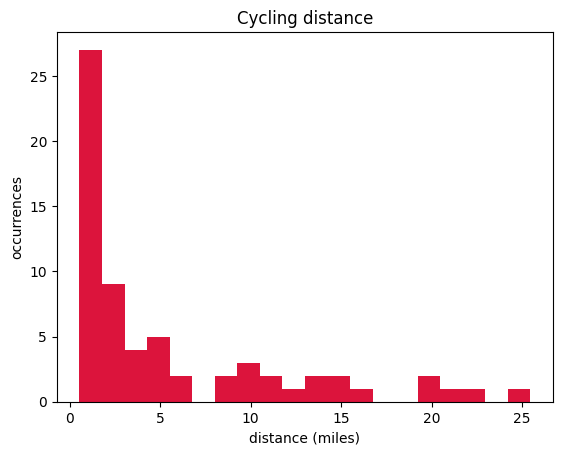

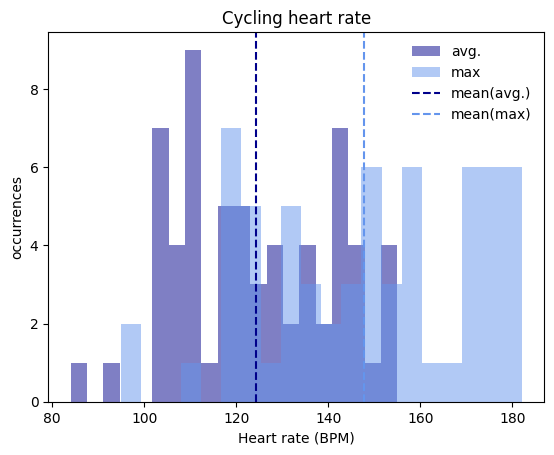

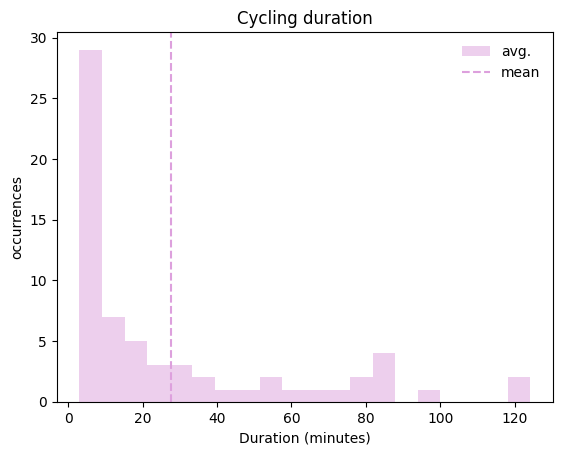

In [124]:
distance = np.array(sport['Distance'].astype(float))

fig,ax = plt.subplots()
ax.hist(distance, bins=20, color='crimson')
ax.set_title(sport_label + " distance")
ax.set_ylabel("occurrences")
ax.set_xlabel("distance (miles)")

avg_hr = np.array(sport['Avg HR'][sport['Avg HR'] != '--'].astype(float))
max_hr = np.array(sport['Max HR'][sport['Max HR'] != '--'].astype(float))

fig,ax = plt.subplots()
ax.hist(avg_hr, bins=20, color='darkblue',alpha=0.5,label='avg.')
ax.hist(max_hr, bins=20, color='cornflowerblue',alpha=0.5,label='max')
ax.axvline(np.mean(avg_hr), color='darkblue', label='mean(avg.)',ls='--')
ax.axvline(np.mean(max_hr), color='cornflowerblue', label='mean(max)',ls='--')
ax.set_title(sport_label + " heart rate")
ax.set_ylabel("occurrences")
ax.set_xlabel("Heart rate (BPM)")
ax.legend(frameon=False)

duration = np.array([digital_time_to_minutes(x) for x in sport['Time']])

fig,ax = plt.subplots()
ax.hist(duration, bins=20, color='plum',alpha=0.5,label='avg.')
ax.axvline(np.mean(duration), color='plum', label='mean',ls='--')
ax.set_title(sport_label + " duration")
ax.set_ylabel("occurrences")
ax.set_xlabel("Duration (minutes)")
ax.legend(frameon=False)

## Running

In [113]:
sport_label = 'Running'
sport = garmin[garmin['Activity Type'] == sport_label]
sport.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Steps,Total Reps,Total Sets,Decompression,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
1,Running,2025-01-07 16:47:46,False,Madison Running,2.04,188,00:19:50,161,177,3.2,...,"3,388",--,--,No,00:00:22.3,3,00:19:45,00:22:15,871,945
6,Running,2024-12-29 08:41:40,False,McHenry County Running,0.13,7,00:01:00.8,107,112,0.3,...,176,--,--,No,00:01:00.8,1,00:00:57,00:01:00.8,962,980
7,Running,2024-12-26 15:55:35,False,McHenry County Running,5.36,478,00:46:13,179,191,5.0,...,"7,716",--,--,No,00:03:04.4,6,00:46:09,00:49:34,866,980
8,Running,2024-12-24 16:10:23,False,McHenry County Running,2.76,234,00:23:27,167,185,4.1,...,"3,928",--,--,No,00:06:21.9,3,00:23:27,00:25:13,887,980
11,Running,2024-12-16 21:49:35,False,Madison Running,0.05,3,00:00:29.4,111,122,0.1,...,72,--,--,No,00:00:29.4,1,00:00:28,00:00:29.4,856,857


In [114]:
sport['Best Lap Time'].head()

1     00:00:22.3
6     00:01:00.8
7     00:03:04.4
8     00:06:21.9
11    00:00:29.4
Name: Best Lap Time, dtype: object

In [115]:
type(sport['Avg HR'])

pandas.core.series.Series

In [116]:
[digital_time_to_minutes(t) for t in np.array(sport['Best Lap Time'])][:5]

[0.3716666666666667, 1.0133333333333334, 3.0733333333333333, 6.365, 0.49]

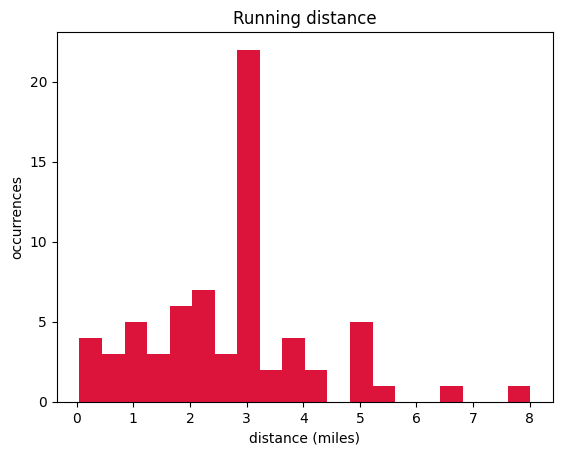

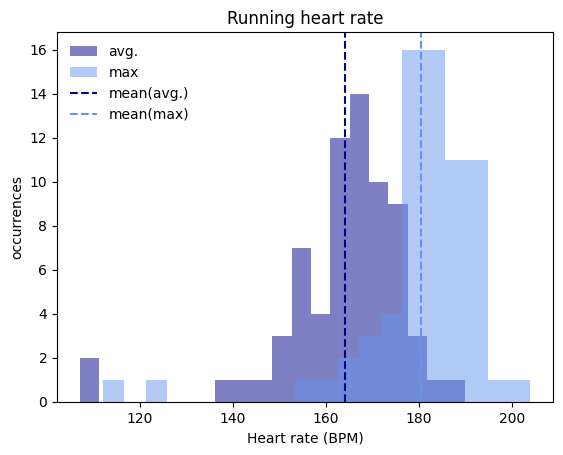

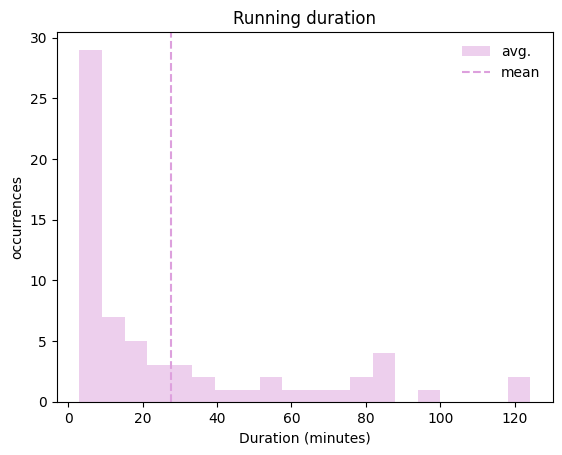

In [118]:
distance = np.array(sport['Distance'].astype(float))

fig,ax = plt.subplots()
ax.hist(distance, bins=20, color='crimson')
ax.set_title(sport_label + " distance")
ax.set_ylabel("occurrences")
ax.set_xlabel("distance (miles)")

avg_hr = np.array(sport['Avg HR'][sport['Avg HR'] != '--'].astype(float))
max_hr = np.array(sport['Max HR'][sport['Max HR'] != '--'].astype(float))

fig,ax = plt.subplots()
ax.hist(avg_hr, bins=20, color='darkblue',alpha=0.5,label='avg.')
ax.hist(max_hr, bins=20, color='cornflowerblue',alpha=0.5,label='max')
ax.axvline(np.mean(avg_hr), color='darkblue', label='mean(avg.)',ls='--')
ax.axvline(np.mean(max_hr), color='cornflowerblue', label='mean(max)',ls='--')
ax.set_title(sport_label + " heart rate")
ax.set_ylabel("occurrences")
ax.set_xlabel("Heart rate (BPM)")
ax.legend(frameon=False)

fig,ax = plt.subplots()
ax.hist(duration, bins=20, color='plum',alpha=0.5,label='avg.')
ax.axvline(np.mean(duration), color='plum', label='mean',ls='--')
ax.set_title(sport_label + " duration")
ax.set_ylabel("occurrences")
ax.set_xlabel("Duration (minutes)")
ax.legend(frameon=False)